In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_path = '/content/drive/MyDrive/MS/4th Sem/DATA 606 Capstone/Dataset/Merged Data'

In [ ]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Construction.csv")

In [ ]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4184 non-null   object 
 1   Symbol              4184 non-null   object 
 2   Series              4184 non-null   object 
 3   Prev Close          4184 non-null   float64
 4   Open                4184 non-null   float64
 5   High                4184 non-null   float64
 6   Low                 4184 non-null   float64
 7   Last                4184 non-null   float64
 8   Close               4184 non-null   float64
 9   VWAP                4184 non-null   float64
 10  Volume              4184 non-null   int64  
 11  Turnover            4184 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4184 non-null   int64  
 14  %Deliverble         4184 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 490.4

In [ ]:
# Summary statistics of the dataset
print(sector_data.describe())

        Prev Close         Open         High          Low         Last  \
count  4184.000000  4184.000000  4184.000000  4184.000000  4184.000000   
mean   1533.954457  1536.559285  1559.038325  1511.295495  1534.166551   
std     588.074537   589.993760   602.260762   574.961274   587.548900   
min       2.000000   500.000000   583.400000   150.000000   564.350000   
25%    1237.212500  1236.487500  1255.962500  1220.037500  1237.875000   
50%    1433.100000  1435.025000  1455.000000  1413.350000  1434.225000   
75%    1666.712500  1668.350000  1685.850000  1646.025000  1667.000000   
max    4506.700000  4510.000000  4690.000000  4430.000000  4512.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  4184.000000  4184.000000  4.184000e+03  4.184000e+03    2456.000000   
mean   1534.274355  1535.421214  1.917127e+06  2.644572e+14   85699.350977   
std     587.604848   588.289079  1.708891e+06  2.036930e+14   48006.882654   
min     562.050000   

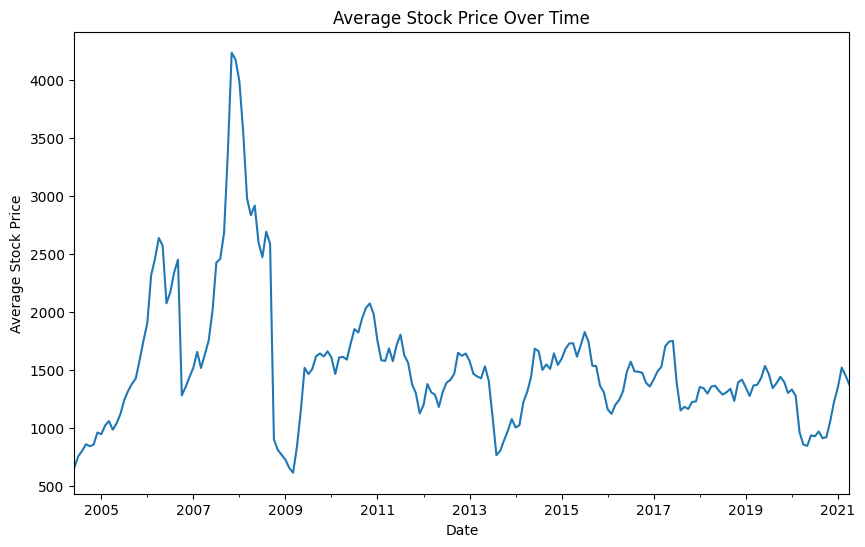

In [ ]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

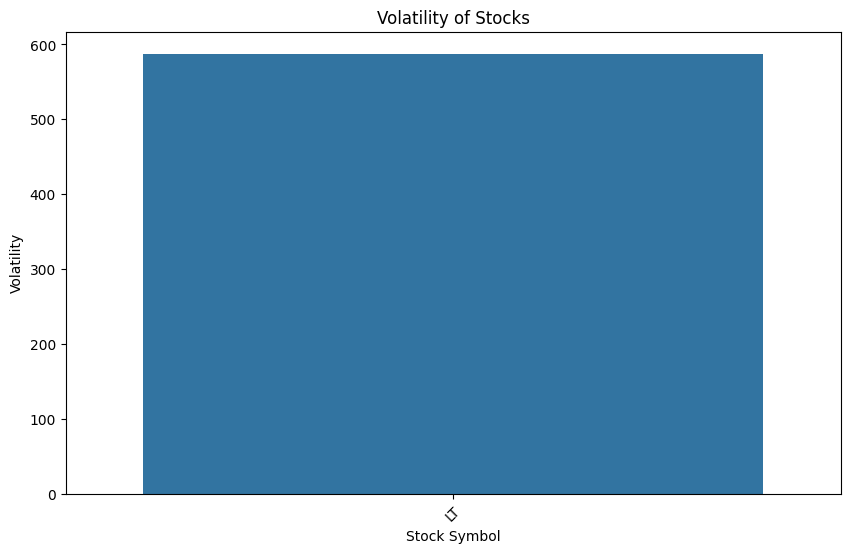

In [ ]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

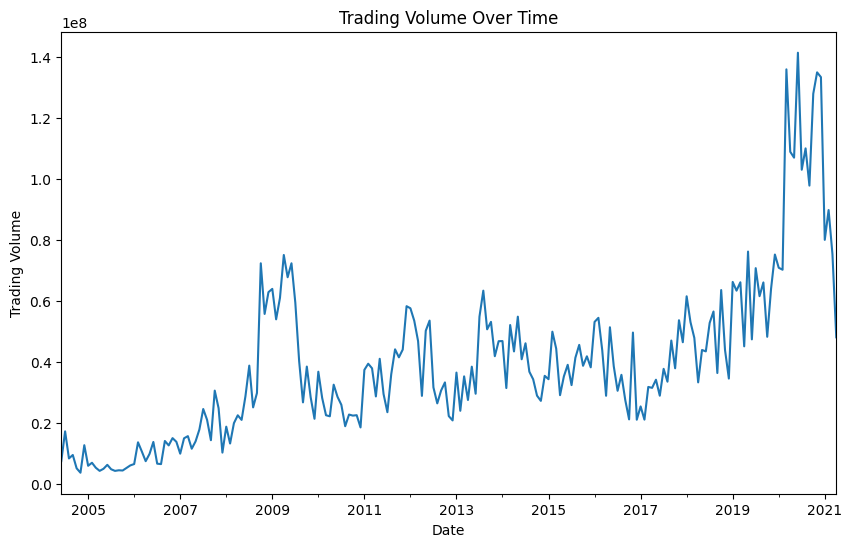

In [ ]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


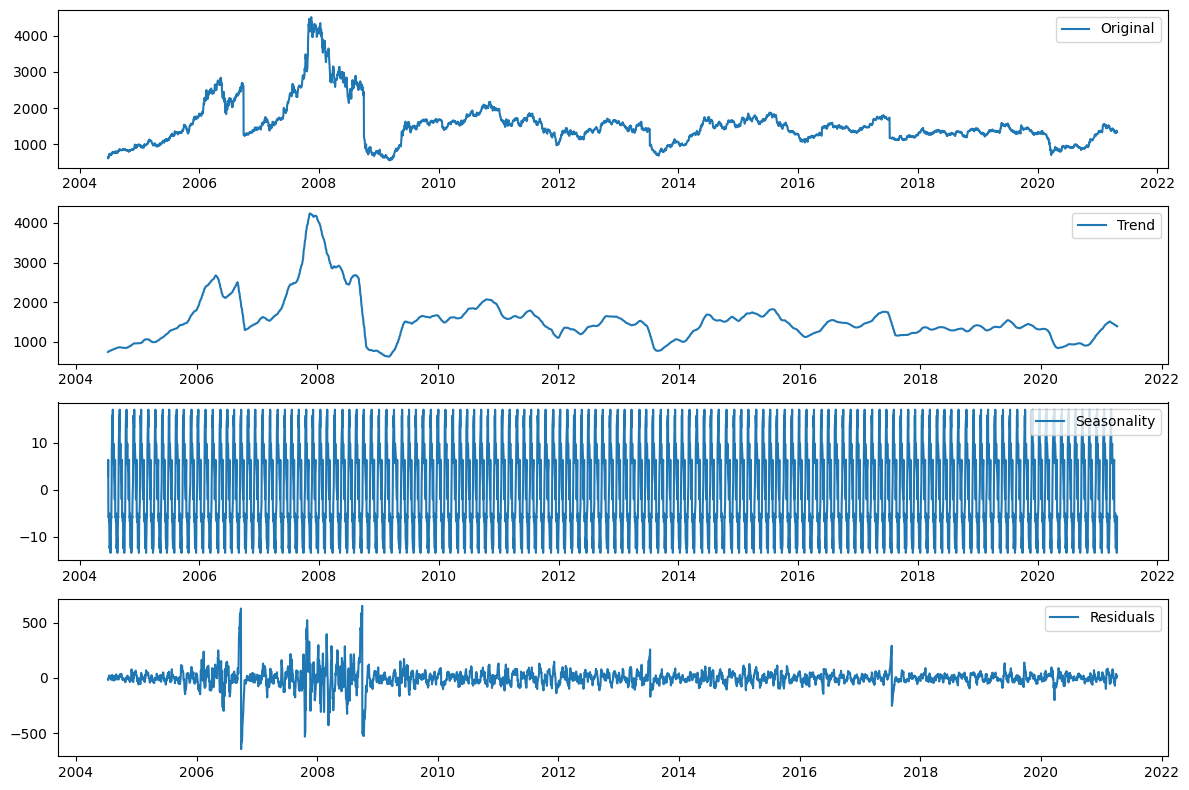

In [ ]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

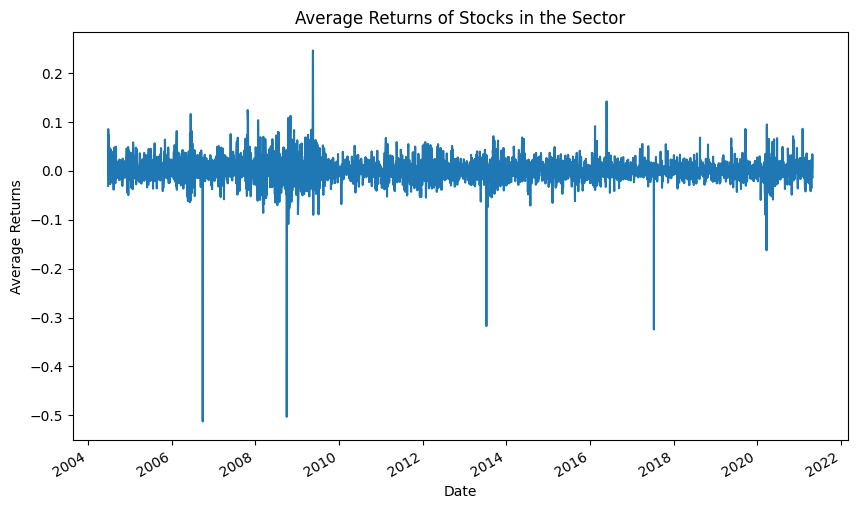

In [ ]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()